## 简述

本数据集来自互联网，其内容是关于 2018 年北京落户的数据。

字段包括：

- id：编号

- name：姓名

- birthday：出生日期

- company：所属公司

- score：积分

### 分析目的

- 分析落户者的年龄分布


- 分析落户者的公司分布

## 分析数据

In [79]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font='SimHei', rc={'axes.unicode_minus':False})

raw_data = pd.read_csv("../20191018_2018年北京积分落户数据分析.csv")

raw_data.head()

,id,name,birthday,company,score
0,1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
1,2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
2,3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
3,4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
4,5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79


### 数据预处理

#### 缺失值

In [5]:
raw_data.info()

# 检测结果：没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 5 columns):
id          6019 non-null int64
name        6019 non-null object
birthday    6019 non-null object
company     6019 non-null object
score       6019 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 235.2+ KB


#### 重复值检测

In [18]:
 raw_data[raw_data.duplicated()]

# 检测结果：没有重复值

,id,name,birthday,company,score


#### 异常值检测

In [9]:
raw_data.describe()

# 基本没法发现异常值

,id,score
count,6019.000000,6019.000000
mean,3010.000000,95.654552
std,1737.679967,4.354445
min,1.000000,90.750000
25%,1505.500000,92.330000
50%,3010.000000,94.460000
75%,4514.500000,97.750000
max,6019.000000,122.590000


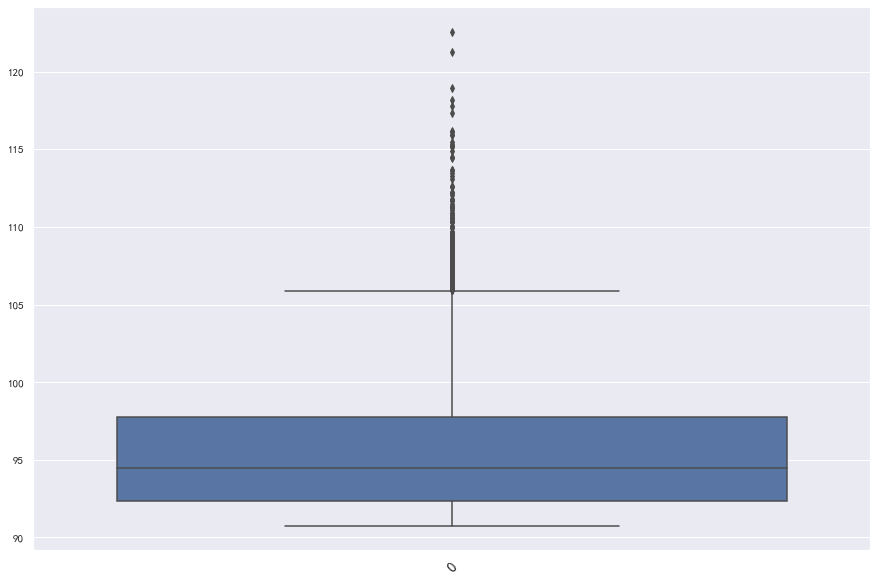

In [12]:
# 使用箱型图检测
plt.figure(figsize=(15,10))
plt.xticks(rotation=45, fontsize=15)
sns.boxplot(data=raw_data.score)

In [17]:
# 根据箱型图，可大致发现：“异常值”都是大于 106 的值
# 列出“异常值”
raw_data[raw_data['score'] > 106]

# 一共 193 条数据
# 暂时保留这些异常值，不作处理

,id,name,birthday,company,score
0,1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
1,2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
2,3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
3,4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
4,5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
...,...,...,...,...,...
188,189,徐洪菲,1973-07,诺和诺德（中国）制药有限公司北京分公司,106.12
189,190,郭亚飞,1975-11,人民网股份有限公司,106.08
190,191,王梦良,1974-09,上海市对外服务有限公司北京人力资源分公司,106.08
191,192,贾莉,1972-05,清华大学,106.05


#### 数据类型转换

In [19]:
raw_data.info()

# 检测结果：无需转换

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 5 columns):
id          6019 non-null int64
name        6019 non-null object
birthday    6019 non-null object
company     6019 non-null object
score       6019 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 235.2+ KB


#### 重置索引

In [21]:
raw_data.head()

# 检测结果：无需重置索引

,id,name,birthday,company,score
0,1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
1,2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
2,3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
3,4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
4,5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79


### 数据分析

#### 分析落户者的年龄分布

In [80]:
# 查看年龄最大和最小的前五
raw_data.sort_values(by='birthday')

,id,name,birthday,company,score
2489,2490,宋玉印,1958-07,中矿资源勘探股份有限公司,95.37
3362,3363,白利光,1959-09,北京国华电力有限责任公司,93.88
4494,4495,徐振山,1960-09,北京国华电力有限责任公司,92.34
3307,3308,邓幼强,1961-09,北京迈威机械有限责任公司,93.96
1604,1605,李翎,1963-09,施乐辉医用产品国际贸易（上海）有限公司北京分公司,97.46
...,...,...,...,...,...
5895,5896,王成法,1984-09,百度在线网络技术（北京）有限公司,90.87
2723,2724,杨在申,1984-11,百度时代网络技术（北京）有限公司,94.96
2831,2832,聂愿愿,1985-01,北京华为数字技术有限公司,94.75
5179,5180,廉峰哲,1985-08,北京戴德梁行物业管理有限公司,91.62


In [83]:
# 创建新列，计算年龄

# 首先进行数据类型转换
raw_data['birthday'] = pd.to_datetime(raw_data['birthday'])
# 输入当前时间
now = pd.Timestamp('now')
# 创建新列
raw_data['age'] = (now - raw_data['birthday']).astype('<m8[Y]')

In [85]:
# 年龄分布预览
raw_data.sort_values(by='age')

,id,name,birthday,company,score,age
5179,5180,廉峰哲,1985-08-01,北京戴德梁行物业管理有限公司,91.62,34.0
2831,2832,聂愿愿,1985-01-01,北京华为数字技术有限公司,94.75,34.0
2744,2745,陈钟,1985-09-01,北京字节跳动科技有限公司,94.91,34.0
2723,2724,杨在申,1984-11-01,百度时代网络技术（北京）有限公司,94.96,35.0
4300,4301,许玲,1984-02-01,北京阿里巴巴云计算技术有限公司,92.59,35.0
...,...,...,...,...,...,...
1604,1605,李翎,1963-09-01,施乐辉医用产品国际贸易（上海）有限公司北京分公司,97.46,56.0
3307,3308,邓幼强,1961-09-01,北京迈威机械有限责任公司,93.96,58.0
4494,4495,徐振山,1960-09-01,北京国华电力有限责任公司,92.34,59.0
3362,3363,白利光,1959-09-01,北京国华电力有限责任公司,93.88,60.0


In [90]:
# 使用 cut 函数对各年龄层进行分类
# 使用世界卫生组织的年龄分段标准
bins = [0,45,59,74]
labels = ["青年","中年", "老年"]

raw_data["age_grade"] = pd.cut(x=raw_data.age,
                               bins=bins,
                               labels=labels)

# 统计各个年龄段的人数
raw_data.groupby(by='age_grade')['name'].count()

age_grade
青年    4918
中年    1099
老年       2
Name: name, dtype: int64

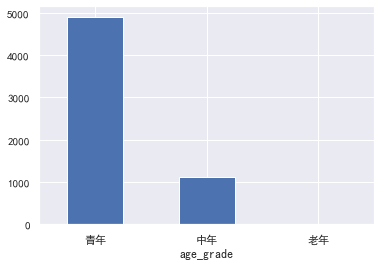

In [97]:
# 简单可视化
raw_data.groupby(by='age_grade')['name'].count().plot(kind='bar', alpha=1, rot=0)

事实上，还是青年人落户的居多，老年人几乎没有可能在北京落户。

至于背后的原因，暂时无法得知。

#### 分析公司分布情况

In [44]:
# 统计各个公司落户数量
company_counts = raw_data.groupby(by='company', as_index=False).count()[['name','company']]
company_counts.sort_values(by='name',ascending=False).head(10)

,name,company
1081,137,北京华为数字技术有限公司
312,73,中央电视台
2457,57,北京首钢建设集团有限公司
3082,55,百度在线网络技术（北京）有限公司
3194,48,联想（北京）有限公司
214,40,中国民生银行股份有限公司
2648,39,国际商业机器（中国）投资有限公司
1334,39,北京外企人力资源服务有限公司
174,29,中国国际技术智力合作有限公司
2514,27,华为技术有限公司北京研究所


In [45]:
# 保存数据
company_counts.to_csv("new_output/03_company_counts.csv")

由于公司数量过多，如果选择可视化，则必然要进行转换，比如说，按入户数量再分区后可视化。这里就不再展开。

In [54]:
# 查找公司名字里面包括“华为”的数据
company_name = "华为"
company_counts[company_counts.company.str.contains(company_name)]

,name,company
1081,137,北京华为数字技术有限公司
2514,27,华为技术有限公司北京研究所
2515,1,华为海洋网络有限公司北京科技分公司


In [57]:
# 查找公司名字里面包括“中央”的数据
company_counts[company_counts.company.str.contains("中央|国企|国家")]

,name,company
5,2,《中国企业报》股份有限公司
311,2,中央数字电视传媒有限公司
312,73,中央电视台
2617,1,国家工业信息安全发展研究中心
2618,1,国家开发投资集团有限公司
2619,1,国家开放大学出版社有限公司
2620,1,国家新闻出版广电总局出版产品质量监督检测中心
2621,3,国家珠宝玉石质量监督检验中心实验室有限公司
2622,1,国家电网公司直流建设分公司
2623,1,国家知识产权局机关服务中心


国企还没有华为公司落户人口数量多，不知道这里面到底是什么原因：华为提供的工资高？华为员工申请的人数多？还是其他原因。由于缺乏其他数据，所以这里不知道背后的原因是什么。

## 总结

由于该份数据有限，能够分析的东西暂时只有这么多。如果想要继续分析，则必然要更多的数据，比如说为什么华为公司能有这么多员工落户北京？和哪些因素有关？这些因素的背后又是什么？这些都可以深挖。但由于时间关系，个人就不做深挖。

数据可视化，不是每份分析结果都适合直接可视化，比如说分析公司分布情况。如果想数据可视化，则必然还要对结果进行整理，比如说按落户数量分区、离散化，然后再做数据可视化。